In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, roc_curve, confusion_matrix

In [2]:
speech = pd.read_csv(r"C:\Users\purav\OneDrive\Desktop\Comparative Evaluation of Anomaly Detection Algorithms\Comparative-Evaluation-of-Anomaly-Detection-Algorithms\Datasets\speech-unsupervised-ad.csv", header = None)

In [3]:
speech

,0,1,2,3,4,5,6,7,8,9,...,391,392,393,394,395,396,397,398,399,400
0,-0.35069,0.52721,-1.62470,-1.334000,-1.03020,1.247500,-0.98067,-1.558700,-0.061233,1.048200,...,0.570960,-1.19840,2.168600,-0.30353,1.21620,-0.607070,0.503820,-0.45571,0.86283,o
1,-0.42537,-0.08818,0.84575,0.881570,1.35690,0.748940,-1.68620,0.461510,0.585700,0.775950,...,-0.582980,-0.35666,-0.638000,0.64106,-0.94488,-1.069700,-0.024029,0.28696,-0.12374,o
2,-1.22100,0.43960,-0.06303,0.709530,0.95079,-0.218740,-1.24850,-1.628600,-1.339700,-1.858500,...,-0.042742,2.77110,1.549400,-1.75680,-0.91595,-0.078469,0.097137,-0.55111,0.69951,o
3,-0.30132,0.55221,0.13769,0.715290,0.99311,-0.169590,-0.93405,-0.948250,-0.750880,0.003107,...,-0.103520,2.53710,2.096000,-1.43680,-1.05230,-0.070276,-0.539810,-1.10380,0.70562,o
4,0.31292,0.42762,0.50348,0.005489,-0.94274,-0.176190,-0.50775,-0.464450,0.694750,0.376040,...,1.060700,1.39660,0.096776,-1.18360,-0.37802,0.357150,1.278600,-0.40139,0.11640,o
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3681,-0.73029,0.41857,-0.41746,-0.454210,0.71168,-0.052522,-1.86610,0.220370,0.488910,-2.072700,...,-0.586100,1.47180,0.263640,-0.68870,-1.10260,0.467970,0.481060,-0.29457,0.55751,n
3682,-0.29375,1.46840,-0.28178,-1.411000,-0.91399,1.427700,0.68553,-0.549750,0.025032,0.857950,...,0.575650,0.58935,2.316300,1.00600,-0.15520,-0.343240,-0.023543,-1.57520,-0.37716,n
3683,0.94843,0.35538,-1.04010,0.292630,0.17207,-0.549300,-2.22700,0.111300,0.403860,0.000354,...,0.544540,2.01170,0.584910,-0.43648,-0.11118,0.197870,0.189580,1.04610,-0.30757,n
3684,1.49800,-0.66785,1.04800,-1.569300,-0.65241,1.957500,0.45265,0.807050,0.601570,0.813750,...,-0.453780,-0.29842,-0.641800,0.49518,-2.56460,-0.708690,0.369670,-0.49249,-0.40257,n


In [4]:
shuffled_df = speech.sample(frac=1).reset_index(drop=True)
shuffled_df

,0,1,2,3,4,5,6,7,8,9,...,391,392,393,394,395,396,397,398,399,400
0,-0.343680,-0.47109,0.228790,0.76301,0.111440,-0.33569,-0.346440,-1.79440,0.11469,-0.463860,...,0.75189,0.458620,0.61038,-0.114630,-0.814910,0.48011,1.26090,-0.39908,0.710340,n
1,-0.516490,-0.63030,-0.091992,-0.81251,1.044700,0.41857,-0.208650,0.94945,-0.16559,1.036000,...,-2.31430,-0.882890,-1.31820,0.857160,-1.863400,-0.87737,1.23390,-0.74781,0.308920,n
2,-0.258610,-0.34531,-0.692260,1.00660,0.834570,0.64147,0.395450,1.50190,1.29480,-0.231660,...,0.46184,1.983000,-1.40820,-1.168000,0.004938,-0.54625,-1.13560,0.78598,1.887600,n
3,0.214660,-0.64960,0.921400,-1.09520,-0.740130,-1.49790,-0.054619,-0.85555,0.28384,-0.552310,...,0.76340,-0.479060,0.73534,1.053300,-1.699500,-0.99443,1.19970,-0.34765,-0.147830,n
4,0.379410,1.76990,-0.270780,1.27330,0.380660,-2.09930,0.500140,-0.31079,-0.94626,-1.390400,...,-0.51168,-0.533600,1.00620,-0.020194,0.936180,0.76871,0.40905,-0.11575,0.445490,n
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3681,1.762100,-0.30945,1.000300,-0.32195,-0.667840,-0.30813,-0.121440,1.29510,0.99916,0.761070,...,-1.27300,0.381210,0.44072,1.208200,-0.420130,-2.32910,0.83856,0.42182,-1.051100,n
3682,-0.048514,0.21909,-1.778700,-0.23819,-0.080393,-0.42386,0.380110,1.97370,1.37140,1.976000,...,1.08520,0.007719,-1.02660,-1.934200,1.697200,-0.16802,1.11810,0.40050,0.045782,n
3683,-1.561400,-2.32330,-1.100100,1.11940,-1.200600,0.73140,-1.293500,0.60783,-1.05740,-0.864200,...,-0.24361,-0.011160,-2.41150,1.551400,-1.457300,0.57562,1.80700,-2.19490,-1.296700,n
3684,-0.590250,-0.46173,1.103900,0.52998,0.647750,1.33570,-0.667950,-0.17284,-0.64916,-0.259920,...,0.36404,-0.929470,1.08930,0.408540,-0.111040,1.51920,0.82441,1.76100,0.211810,n


In [5]:
df = pd.DataFrame(shuffled_df.iloc[:, :-1].values)

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
ss = StandardScaler()
df = pd.DataFrame(ss.fit_transform(df))

In [8]:
df

,0,1,2,3,4,5,6,7,8,9,...,390,391,392,393,394,395,396,397,398,399
0,-0.172168,-0.641449,0.009492,0.621166,0.253736,-0.254764,-0.255396,-1.987440,-0.129481,-0.454389,...,0.217186,0.978702,0.177342,0.058103,0.033139,-0.406218,0.048554,0.777126,-0.361064,0.631886
1,-0.363989,-0.818098,-0.332941,-1.137756,1.295736,0.545060,-0.104084,0.975245,-0.434316,1.169405,...,-1.420523,-2.351440,-1.288557,-2.058256,1.089477,-1.527856,-1.518352,0.746002,-0.737082,0.194068
2,-0.077739,-0.501892,-0.973725,0.893112,1.061123,0.781424,0.559300,1.571756,1.154021,-0.203002,...,0.688092,0.663683,1.843067,-2.157018,-1.111876,0.470827,-1.136148,-1.985424,0.916726,1.915894
3,0.447595,-0.839511,0.748850,-1.453353,-0.697055,-1.487180,0.065063,-0.973712,0.054489,-0.550147,...,-0.427067,0.991203,-0.847283,0.195230,1.302682,-1.352521,-1.653472,0.706578,-0.305610,-0.304098
4,0.630469,1.844998,-0.523797,1.190858,0.554325,-2.124909,0.674264,-0.385505,-1.283382,-1.457489,...,-0.332943,-0.393642,-0.906880,0.492463,0.135791,1.467036,0.381678,-0.204839,-0.055564,0.343021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3681,2.165268,-0.462105,0.833076,-0.590091,-0.616342,-0.225539,-0.008315,1.348462,0.832479,0.871758,...,0.505712,-1.220500,0.092754,-0.128076,1.471058,0.016104,-3.194049,0.290276,0.524071,-1.289272
3682,0.155469,0.124327,-2.133495,-0.496581,0.039552,-0.348260,0.542455,2.081184,1.237332,2.187078,...,-0.091690,1.340705,-0.315368,-1.738264,-1.944737,2.281149,-0.699567,0.612514,0.501083,-0.092930
3683,-1.523849,-2.696533,-1.409092,1.019043,-1.211178,0.876787,-1.295397,0.606379,-1.404260,-0.887809,...,1.457140,-0.102495,-0.335997,-3.258006,1.844117,-1.093424,0.158799,1.406639,-2.297406,-1.557141
3684,-0.445863,-0.631064,0.943668,0.361010,0.852535,1.517591,-0.608458,-0.236553,-0.960253,-0.233597,...,-1.345165,0.557464,-1.339456,0.583654,0.601826,0.346757,1.247950,0.273965,1.968041,0.088152


In [9]:
from sklearn.decomposition import PCA

In [10]:
pca = PCA()
pca.fit(df)
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
num_components = np.argmax(cumulative_variance >= 0.95) + 1
print(num_components)

343


In [11]:
pca = PCA(n_components=343)
new_df = pca.fit_transform(df)

In [12]:
new_df

array([[-1.24735803, -4.04634914,  1.52180421, ..., -1.02458128,
        -0.153655  ,  0.62929323],
       [ 0.77417569,  0.05526721,  0.64416685, ..., -1.73409465,
        -0.65259561, -0.31883889],
       [ 2.15538833,  1.41946025, -1.55405097, ...,  1.37002625,
        -0.56999278,  0.5999647 ],
       ...,
       [-2.88412212,  3.61460806, -0.25098236, ..., -1.41262952,
         1.17405212, -0.20544903],
       [-2.91890546,  0.79804973,  1.72377241, ...,  0.61644766,
        -0.20436679,  0.25227419],
       [ 4.97479973,  1.6057589 ,  3.20179913, ..., -1.29778171,
         0.04103889,  1.19344267]])

In [13]:
df = pd.DataFrame(new_df)
df

,0,1,2,3,4,5,6,7,8,9,...,333,334,335,336,337,338,339,340,341,342
0,-1.247358,-4.046349,1.521804,-0.303019,1.529578,-2.127633,-0.334790,-0.580148,-1.613885,0.700784,...,-0.004430,0.451915,0.046139,1.792717,-0.099829,0.063343,0.481297,-1.024581,-0.153655,0.629293
1,0.774176,0.055267,0.644167,-2.621338,-1.995119,0.870122,2.778276,-2.006131,3.514779,1.313932,...,-0.341223,-1.347730,0.485314,-0.654054,0.191963,0.013281,-0.644540,-1.734095,-0.652596,-0.318839
2,2.155388,1.419460,-1.554051,4.749806,-2.893100,-1.030769,1.836834,0.524492,-0.110776,-1.148729,...,-0.491623,-0.262471,0.015998,-0.386010,0.550601,0.352858,0.768860,1.370026,-0.569993,0.599965
3,-0.151719,0.192087,-0.132244,-2.200812,0.740047,0.460215,1.290092,-0.217670,2.360184,0.460548,...,0.577812,0.352652,0.622700,-0.644972,-0.217142,0.659328,0.181162,0.115828,0.960517,-0.138964
4,3.055390,-1.235544,0.541051,0.540124,-2.561380,1.374984,0.705636,-1.370249,1.054101,-0.438176,...,0.462369,-0.768676,0.260042,-0.875918,1.246599,-0.513217,-1.053231,1.938167,-0.884584,0.719777
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3681,1.894013,4.828680,0.319670,4.998890,-1.716260,2.525748,-0.899851,0.836387,-0.644417,-0.143183,...,-1.518793,0.281976,-0.307648,-0.073406,-0.152706,0.588939,0.724452,-1.402206,-0.230203,0.393632
3682,3.667234,-0.104736,-1.873515,-0.617269,3.955853,1.154340,-2.500218,1.078927,-2.241198,0.435210,...,1.288616,0.627731,1.106765,0.381159,0.537673,0.603912,-0.586202,0.580482,-0.820906,0.002253
3683,-2.884122,3.614608,-0.250982,0.592703,-0.069713,-1.422441,-2.566862,0.399516,-0.107048,-1.263769,...,0.577553,0.061150,-0.847086,-1.315285,-0.177446,-0.134892,0.025813,-1.412630,1.174052,-0.205449
3684,-2.918905,0.798050,1.723772,0.310825,-0.241378,1.204360,0.508021,3.040787,-3.233601,-0.803901,...,-0.152632,-0.415249,-0.536129,-1.014872,0.045504,0.413766,0.532429,0.616448,-0.204367,0.252274


Base Case of Algorithms

In [14]:
from pyod.models.lof import LOF
from pyod.models.cblof import CBLOF
from pyod.models.cof import COF
from pyod.models.knn import KNN

In [15]:
y = shuffled_df.iloc[:,-1]
y = pd.DataFrame(y.replace({'o':1, 'n':0}))

In [16]:
y

,400
0,0
1,0
2,0
3,0
4,0
...,...
3681,0
3682,0
3683,0
3684,0


Performance over multiple parameters

c:\Users\purav\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\purav\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\purav\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\purav\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

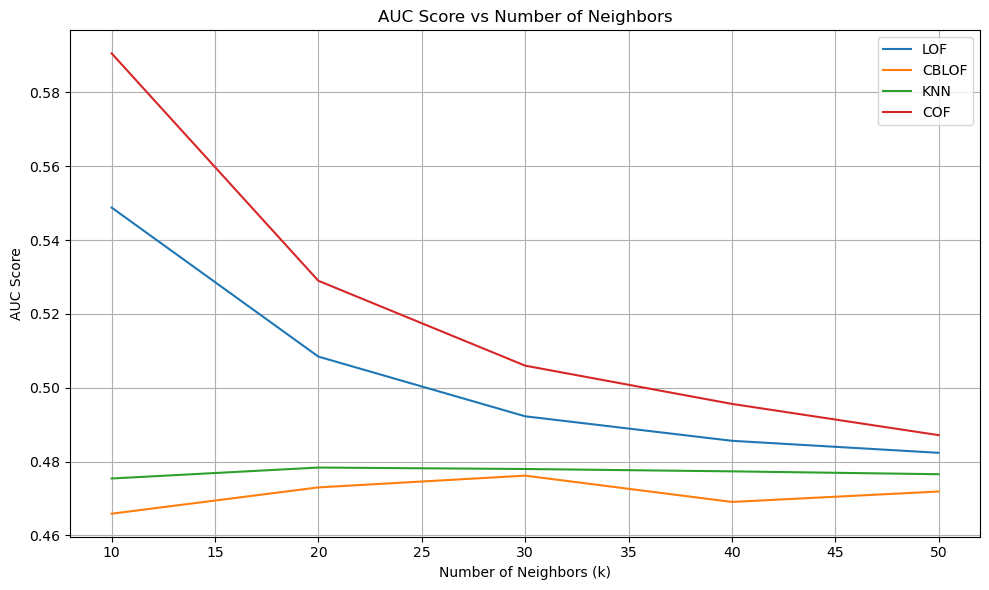

In [19]:
auc_scores_lof = []
auc_scores_cblof = []
auc_scores_knn = []
auc_scores_cof = []
n_neighbors_list = [10,20,30,40,50]
accuracy_scores_lof = []
accuracy_scores_cblof = []
accuracy_scores_knn = []
accuracy_scores_cof = []

# Evaluate AUC scores for LOF, CBLOF, and KNN over multiple neighbors
for n_neighbors in n_neighbors_list:
    # LOF
    lof_model = LOF(n_neighbors=n_neighbors)
    lof_model.fit(df)
    y_scores_lof = lof_model.decision_function(df)
    lof_pred = lof_model.labels_
    auc_lof = roc_auc_score(y, y_scores_lof)

    auc_scores_lof.append(auc_lof)
    accuracy_lof = accuracy_score(y, lof_pred)
    accuracy_scores_lof.append(accuracy_lof)

    cof_model = COF(n_neighbors=n_neighbors)
    cof_model.fit(df)
    y_scores_cof = cof_model.decision_function(df)
    cof_pred = cof_model.labels_
    auc_cof = roc_auc_score(y, y_scores_cof)

    auc_scores_cof.append(auc_cof)
    accuracy_cof = accuracy_score(y, cof_pred)
    accuracy_scores_cof.append(accuracy_cof)


    # CBLOF
    cblof_model = CBLOF(n_clusters=n_neighbors)
    cblof_model.fit(df)
    y_scores_cblof = cblof_model.decision_function(df)
    cblof_pred = cblof_model.labels_
    auc_cblof = roc_auc_score(y, y_scores_cblof)

    auc_scores_cblof.append(auc_cblof)
    accuracy_cblof = accuracy_score(y, cblof_pred)
    accuracy_scores_cblof.append(accuracy_cblof)
    
    # KNN
    knn_model = KNN(n_neighbors=n_neighbors)
    knn_model.fit(df)
    y_scores_knn = knn_model.decision_function(df)
    knn_pred = knn_model.labels_
    auc_knn = roc_auc_score(y, y_scores_knn)

    auc_scores_knn.append(auc_knn)
    accuracy_knn = accuracy_score(y, knn_pred)
    accuracy_scores_knn.append(accuracy_knn)

# Calculate mean AUC score for each model
mean_auc_lof = np.mean(auc_scores_lof)
mean_auc_cblof = np.mean(auc_scores_cblof)
mean_auc_knn = np.mean(auc_scores_knn)
mean_auc_cof = np.mean(auc_scores_cof)
mean_acc_lof = np.mean(accuracy_scores_lof)
mean_acc_cblof = np.mean(accuracy_scores_cblof)
mean_acc_knn = np.mean(accuracy_scores_knn)
mean_acc_cof = np.mean(accuracy_scores_cof)
plt.figure(figsize=(10, 6))

# Plot LOF AUC
plt.plot(n_neighbors_list, auc_scores_lof, label='LOF')

# Plot CBLOF AUC
plt.plot(n_neighbors_list, auc_scores_cblof, label='CBLOF')

# Plot KNN AUC
plt.plot(n_neighbors_list, auc_scores_knn, label='KNN')

plt.plot(n_neighbors_list, auc_scores_cof, label='COF')

# Add labels and title
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('AUC Score')
plt.title('AUC Score vs Number of Neighbors')
plt.legend()

# Show plot
plt.grid(True)
plt.tight_layout()
plt.show()

In [20]:
print("KNN auc",mean_auc_knn)
print("LOF auc",mean_auc_lof)
print("CBLOF auc",mean_auc_cblof)
print("COF auc",mean_auc_cof)

print("KNN acc",mean_acc_knn)
print("LOF acc",mean_acc_lof)
print("CBLOF acc",mean_acc_cblof)
print("COF acc",mean_acc_cof)



KNN auc 0.47715907292255516
LOF auc 0.5035170152628604
CBLOF auc 0.4712221594120972
COF auc 0.5216804974561898
KNN acc 0.8873575691806836
LOF acc 0.8880086814975583
CBLOF acc 0.8872490504612045
COF acc 0.8887683125339121
